In [1]:
import os
import glob

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
from helpers import *

### Per kön

In [3]:
concept = 'mean_income_aged_gt_20'

In [4]:
medelkon = glob.glob('../indata/supermappen/*MedelkonBas*.csv')

In [5]:
def readMedelkonBas(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=1)
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        "M=1 Kv = 2":'Kön',
        'Basområde': 'BASKOD2010',
        'inkl 0': 'value'
    })
    df['Kön'] = df['Kön'].astype('category')
    df['Kön'].cat.categories = ['male', 'female']
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [6]:
df = pd.concat(list(map(readMedelkonBas, medelkon)))

In [7]:
df.head()

,BASKOD2010,Kön,exkl 0,value,year
0,1010110,male,322000,286200,2015
1,1010110,female,294900,294900,2015
2,1010120,male,467700,409200,2015
3,1010120,female,346900,322500,2015
4,1010130,male,466900,428900,2015


In [8]:
df = df[['BASKOD2010', 'year','Kön', 'value']]

In [9]:
df = baskod2010tobasomrade(df, n_numeric=1)

In [10]:
male, female = byGender(concept, df)

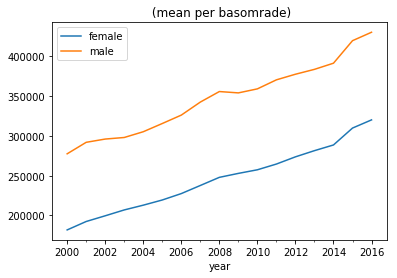

In [11]:
plotcombined(female, 'female')
plotcombined(male, 'male')

### Total

In [12]:
medel = glob.glob('../indata/supermappen/*MedelBas*.csv')

In [13]:
concept = 'mean_income_aged_gt_20'

In [14]:
def readMedel(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',')
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        'basomrade': 'BASKOD2010',
        'Medel': 'value'
    })
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [15]:
df = pd.concat(list(map(readMedel, medel)))

In [16]:
df = df[['BASKOD2010', 'year', 'value']]

In [17]:
df = baskod2010tobasomrade(df)

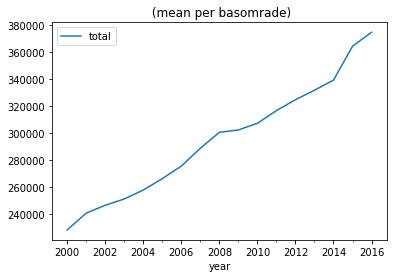

In [18]:
combined = appendNewDatapoints(concept, df)
plotcombined(combined, 'total')